# Edge Detection

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image, ImageOps

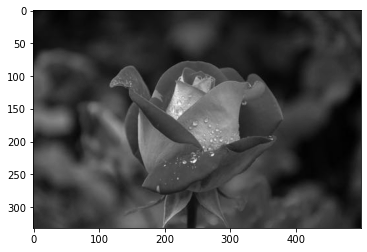

In [49]:
img = ImageOps.grayscale(Image.open('flower.png'))
plt.imshow(img, cmap='gray')

### Sobel Edge Detection

In [50]:
radius = 3
sigma = float(radius / 3.)
gaussian = np.array(([np.exp(-x**2 / (2 * sigma**2)) for x in np.linspace(-radius, radius, 2 * radius + 1)]))
gaussian = gaussian / np.sum(gaussian)

sobel = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))

gx = signal.convolve2d(img, sobel, 'same')
gy = signal.convolve2d(img, sobel.T, 'same')
magnitude = np.sqrt(gx**2 + gy**2)
orientation = np.arctan2(gy, gx)

Text(0.5, 1.0, 'Gaussian kernel')

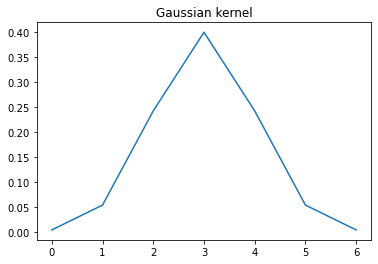

In [51]:
plt.plot(gaussian)
plt.title('Gaussian kernel')

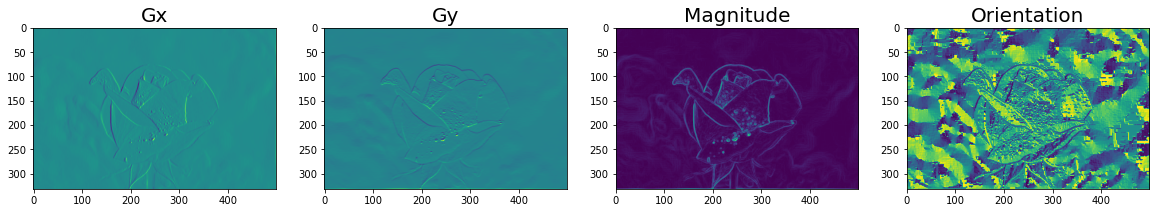

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,20))
ax1.imshow(gx)
ax1.set_title('Gx', fontsize=20)
ax2.imshow(gy)
ax2.set_title('Gy', fontsize=20)
ax3.imshow(magnitude)
ax3.set_title('Magnitude', fontsize=20)
ax4.imshow(orientation)
ax4.set_title('Orientation', fontsize=20)
plt.show()

To generate the orientation map image, a HSB image is made by taking :
* The local orientation as hue
* The original image gray value as brightness
* The gradient magnitude as  saturation

Documentation for **matplotlib.colors.hsv_to_rgb(hsv)** :
* **hsv : (..., 3) array-like** : All values assumed to be in range [0, 1]
* **rgb : (..., 3) ndarray** : Colors converted to RGB values in range [0, 1]

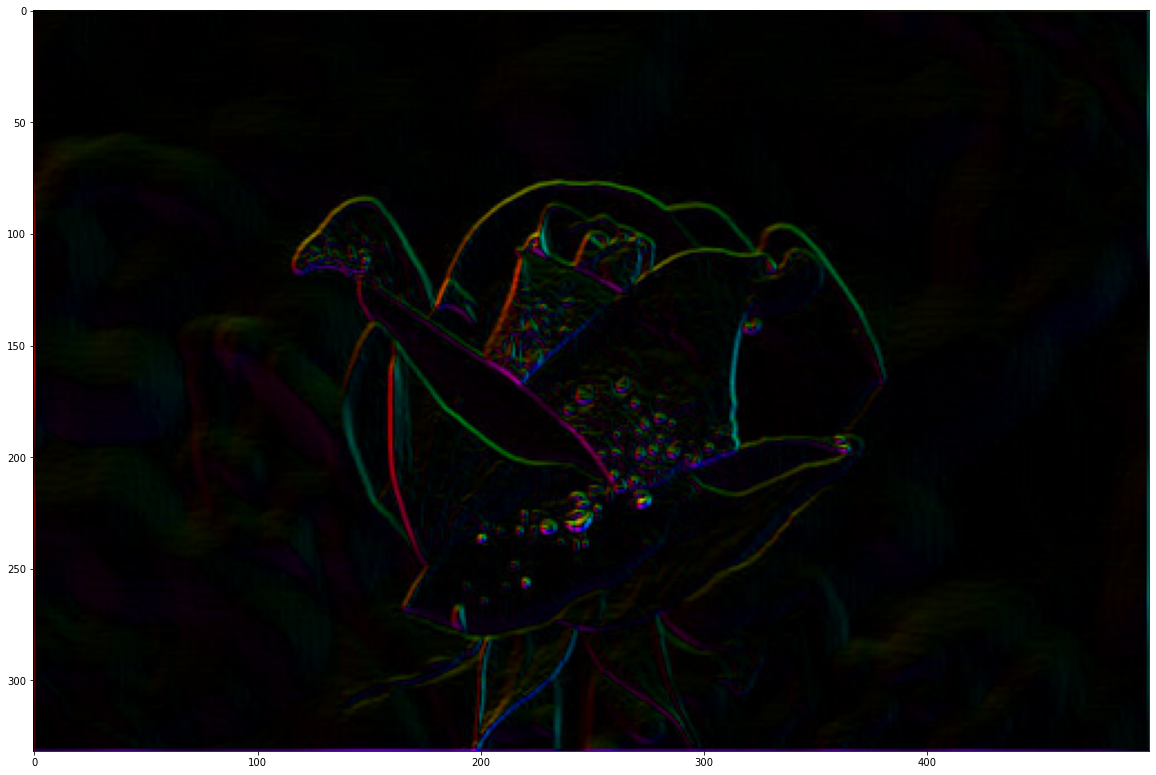

In [55]:
def normalise(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

hue = normalise((orientation + np.pi) / np.pi * 180.)
saturation = np.ones((img.size[1], img.size[0]))
value = normalise(magnitude)

hsv = np.dstack((hue, saturation, value))
rgb = mpl.colors.hsv_to_rgb(hsv)

plt.figure(figsize=(20,20))
plt.imshow(rgb)